<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.8
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
!pip install catboost
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import catboost

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import catboost

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [5]:
data = pd.read_csv('train.csv')
data.head()




,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
# YOUR CODE
data.sample(7)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1357,15,74.90,1107.25,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
493,16,94.25,1483.25,Male,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3607,31,99.95,3186.65,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3403,51,30.05,1529.45,Male,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
4047,2,65.70,134.35,Female,0,Yes,Yes,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,1
3568,5,64.35,352.65,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,0
1465,66,19.75,1344.5,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0


In [19]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]


# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

data['TotalSpent'] = data['TotalSpent'].replace(' ','0', regex=True).astype('float64')

cat_data=data[cat_cols]
num_data=data[num_cols]


feature_cols = num_cols + cat_cols
target_col = 'Churn'


In [8]:
data.isna().sum() # проверим число Nan в каждом столбце


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Виден дисбаланс классов:


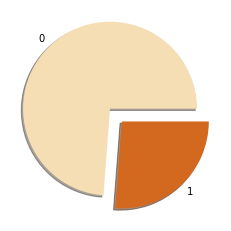

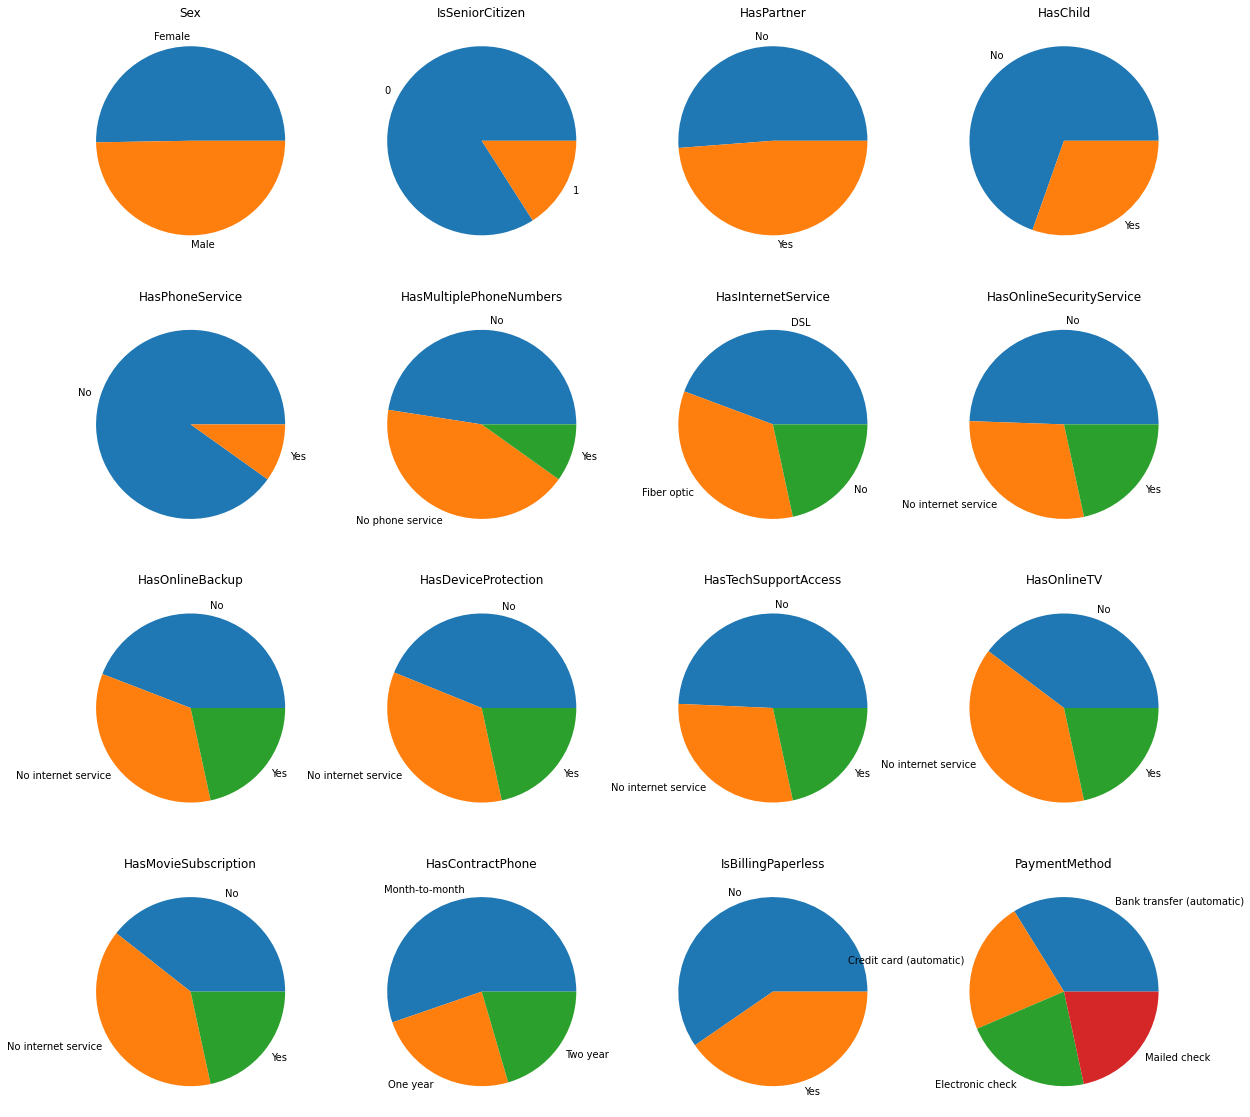

In [9]:
plt.pie(data[target_col].value_counts(), labels=[0, 1], colors=['wheat', 'chocolate'], explode=[0.1, 0.1], shadow=True)
print('Виден дисбаланс классов:');

fig = plt.figure(figsize=(20, 20))

for i,col in enumerate(cat_cols):
 ax = fig.add_subplot(4, 4, i+1)
 ax.pie(data[col].value_counts(),labels=np.unique(data[col].values))
 ax.set(title = f'{col}', xticks=[], yticks=[])






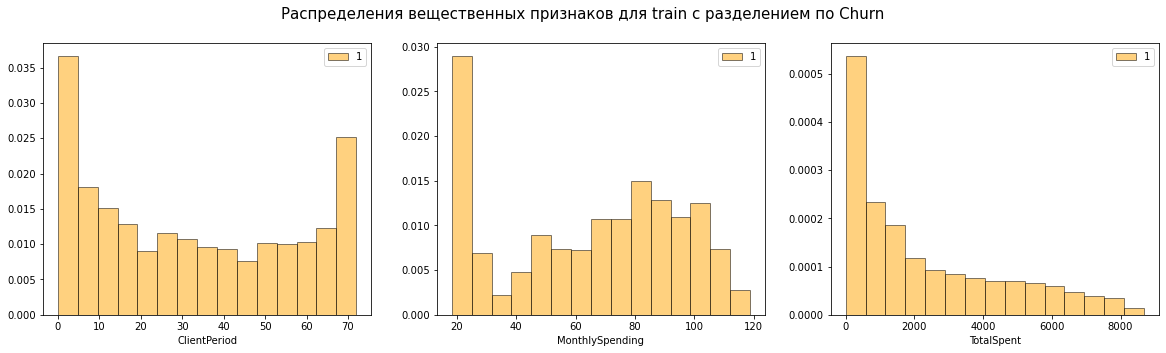

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
axes = axes.ravel()
for i, cat in enumerate(num_cols):
    axes[i].hist(x=data[cat], density=True, alpha=0.5, bins=15, label='1', edgecolor='black', color='orange')
    axes[i].set(xlabel = cat)
    axes[i].legend()
fig.suptitle('Распределения вещественных признаков для train с разделением по Churn', fontsize=15);

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [32]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline


In [28]:
# юб
X = data[feature_cols]
y = data[target_col]

In [29]:
X_origin= data[feature_cols]

In [36]:
X_train

array([[31, 73.55, 2094.65, ..., 'Month-to-month', 'Yes',
        'Credit card (automatic)'],
       [59, 100.05, 6034.85, ..., 'Two year', 'Yes', 'Mailed check'],
       [60, 99.0, 6017.9, ..., 'Month-to-month', 'Yes',
        'Electronic check'],
       ...,
       [50, 20.55, 1070.25, ..., 'Two year', 'No',
        'Credit card (automatic)'],
       [8, 84.5, 662.65, ..., 'Month-to-month', 'No',
        'Bank transfer (automatic)'],
       [68, 54.45, 3674.95, ..., 'One year', 'Yes',
        'Credit card (automatic)']], dtype=object)

In [31]:
scaler = StandardScaler()

num_data = pd.DataFrame(scaler.fit_transform(num_data),columns=num_cols) # нормируем числовые данные

In [32]:
dummy_features = pd.get_dummies(cat_data) # one-hot-encoding к категориальным

In [33]:
X = pd.concat([num_data, dummy_features], axis=1)
y=data['Churn']

In [34]:
# юб
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.972013,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5278,0.717084,-0.678565,-0.043651,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5279,-1.279005,-0.327265,-0.983957,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,-0.138382,0.367051,-0.031838,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [37]:
X_train, X_test, y_train,y_test = train_test_split(X.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [38]:
CV_model = GridSearchCV(estimator=LogisticRegression(), 
                            param_grid={'C':[100, 10, 1, 0.1, 0.01, 0.001]},
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1 
                            )
CV_model.fit(X_train, y_train)

probs=CV_model.predict_proba(X_test)[:,1]

print(f'roc auc score : {roc_auc_score(y_test, probs)}')

roc auc score : 0.8268486622768537


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

$ alpha^2 = 0.8268486622768537, C = 100 $

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [39]:
X_train_origin, X_test_origin, y_train,y_test = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
boosting_model = catboost.CatBoostClassifier(cat_features=np.arange(3,data.shape[1]-1))
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]


Learning rate set to 0.019062
0:	learn: 0.6798227	total: 107ms	remaining: 1m 46s
1:	learn: 0.6678084	total: 128ms	remaining: 1m 4s
2:	learn: 0.6553003	total: 151ms	remaining: 50s
3:	learn: 0.6435910	total: 177ms	remaining: 44.2s
4:	learn: 0.6326850	total: 200ms	remaining: 39.9s
5:	learn: 0.6225823	total: 223ms	remaining: 37s
6:	learn: 0.6128742	total: 241ms	remaining: 34.1s
7:	learn: 0.6048572	total: 250ms	remaining: 31.1s
8:	learn: 0.5958847	total: 270ms	remaining: 29.7s
9:	learn: 0.5871696	total: 289ms	remaining: 28.6s
10:	learn: 0.5792007	total: 310ms	remaining: 27.8s
11:	learn: 0.5713099	total: 333ms	remaining: 27.4s
12:	learn: 0.5643834	total: 349ms	remaining: 26.5s
13:	learn: 0.5569418	total: 371ms	remaining: 26.1s
14:	learn: 0.5502712	total: 399ms	remaining: 26.2s
15:	learn: 0.5441586	total: 421ms	remaining: 25.9s
16:	learn: 0.5381109	total: 441ms	remaining: 25.5s
17:	learn: 0.5324322	total: 461ms	remaining: 25.1s
18:	learn: 0.5268003	total: 483ms	remaining: 24.9s
19:	learn: 0.5

161:	learn: 0.3894201	total: 3.18s	remaining: 16.4s
162:	learn: 0.3894030	total: 3.18s	remaining: 16.3s
163:	learn: 0.3892766	total: 3.21s	remaining: 16.4s
164:	learn: 0.3891572	total: 3.23s	remaining: 16.3s
165:	learn: 0.3888679	total: 3.25s	remaining: 16.3s
166:	learn: 0.3886342	total: 3.27s	remaining: 16.3s
167:	learn: 0.3884733	total: 3.29s	remaining: 16.3s
168:	learn: 0.3883674	total: 3.31s	remaining: 16.3s
169:	learn: 0.3882153	total: 3.33s	remaining: 16.3s
170:	learn: 0.3879833	total: 3.35s	remaining: 16.3s
171:	learn: 0.3878007	total: 3.38s	remaining: 16.3s
172:	learn: 0.3878002	total: 3.38s	remaining: 16.2s
173:	learn: 0.3876802	total: 3.4s	remaining: 16.2s
174:	learn: 0.3876706	total: 3.42s	remaining: 16.1s
175:	learn: 0.3874036	total: 3.44s	remaining: 16.1s
176:	learn: 0.3873755	total: 3.45s	remaining: 16.1s
177:	learn: 0.3873591	total: 3.47s	remaining: 16s
178:	learn: 0.3873043	total: 3.49s	remaining: 16s
179:	learn: 0.3871391	total: 3.51s	remaining: 16s
180:	learn: 0.38693

329:	learn: 0.3733538	total: 6.45s	remaining: 13.1s
330:	learn: 0.3732754	total: 6.46s	remaining: 13.1s
331:	learn: 0.3732342	total: 6.49s	remaining: 13.1s
332:	learn: 0.3730373	total: 6.51s	remaining: 13s
333:	learn: 0.3730239	total: 6.53s	remaining: 13s
334:	learn: 0.3728094	total: 6.55s	remaining: 13s
335:	learn: 0.3727191	total: 6.57s	remaining: 13s
336:	learn: 0.3725564	total: 6.59s	remaining: 13s
337:	learn: 0.3725012	total: 6.61s	remaining: 12.9s
338:	learn: 0.3723967	total: 6.63s	remaining: 12.9s
339:	learn: 0.3723952	total: 6.64s	remaining: 12.9s
340:	learn: 0.3723505	total: 6.66s	remaining: 12.9s
341:	learn: 0.3721993	total: 6.68s	remaining: 12.9s
342:	learn: 0.3721464	total: 6.7s	remaining: 12.8s
343:	learn: 0.3720769	total: 6.72s	remaining: 12.8s
344:	learn: 0.3720496	total: 6.74s	remaining: 12.8s
345:	learn: 0.3719755	total: 6.76s	remaining: 12.8s
346:	learn: 0.3719437	total: 6.78s	remaining: 12.8s
347:	learn: 0.3718225	total: 6.8s	remaining: 12.7s
348:	learn: 0.3718059	to

496:	learn: 0.3570744	total: 9.73s	remaining: 9.85s
497:	learn: 0.3569443	total: 9.76s	remaining: 9.84s
498:	learn: 0.3569074	total: 9.78s	remaining: 9.82s
499:	learn: 0.3568648	total: 9.8s	remaining: 9.8s
500:	learn: 0.3568328	total: 9.82s	remaining: 9.78s
501:	learn: 0.3566875	total: 9.84s	remaining: 9.76s
502:	learn: 0.3565992	total: 9.86s	remaining: 9.74s
503:	learn: 0.3565116	total: 9.88s	remaining: 9.72s
504:	learn: 0.3563565	total: 9.9s	remaining: 9.7s
505:	learn: 0.3563492	total: 9.92s	remaining: 9.68s
506:	learn: 0.3562508	total: 9.94s	remaining: 9.67s
507:	learn: 0.3561802	total: 9.96s	remaining: 9.65s
508:	learn: 0.3561754	total: 9.97s	remaining: 9.62s
509:	learn: 0.3560655	total: 9.99s	remaining: 9.6s
510:	learn: 0.3560227	total: 10s	remaining: 9.58s
511:	learn: 0.3558538	total: 10s	remaining: 9.56s
512:	learn: 0.3556728	total: 10.1s	remaining: 9.54s
513:	learn: 0.3555847	total: 10.1s	remaining: 9.53s
514:	learn: 0.3555137	total: 10.1s	remaining: 9.51s
515:	learn: 0.3553841

663:	learn: 0.3398097	total: 13.3s	remaining: 6.72s
664:	learn: 0.3398096	total: 13.3s	remaining: 6.7s
665:	learn: 0.3396917	total: 13.3s	remaining: 6.68s
666:	learn: 0.3396861	total: 13.3s	remaining: 6.66s
667:	learn: 0.3395033	total: 13.4s	remaining: 6.64s
668:	learn: 0.3394443	total: 13.4s	remaining: 6.62s
669:	learn: 0.3393422	total: 13.4s	remaining: 6.6s
670:	learn: 0.3391934	total: 13.4s	remaining: 6.58s
671:	learn: 0.3390958	total: 13.4s	remaining: 6.56s
672:	learn: 0.3390083	total: 13.5s	remaining: 6.54s
673:	learn: 0.3389149	total: 13.5s	remaining: 6.53s
674:	learn: 0.3389071	total: 13.5s	remaining: 6.51s
675:	learn: 0.3388379	total: 13.5s	remaining: 6.49s
676:	learn: 0.3386786	total: 13.6s	remaining: 6.47s
677:	learn: 0.3386043	total: 13.6s	remaining: 6.45s
678:	learn: 0.3384877	total: 13.6s	remaining: 6.43s
679:	learn: 0.3384627	total: 13.6s	remaining: 6.41s
680:	learn: 0.3383855	total: 13.6s	remaining: 6.39s
681:	learn: 0.3383603	total: 13.7s	remaining: 6.37s
682:	learn: 0.

827:	learn: 0.3267245	total: 16.8s	remaining: 3.49s
828:	learn: 0.3264680	total: 16.8s	remaining: 3.47s
829:	learn: 0.3263352	total: 16.8s	remaining: 3.45s
830:	learn: 0.3262118	total: 16.9s	remaining: 3.43s
831:	learn: 0.3261863	total: 16.9s	remaining: 3.41s
832:	learn: 0.3261414	total: 16.9s	remaining: 3.39s
833:	learn: 0.3260814	total: 16.9s	remaining: 3.37s
834:	learn: 0.3260337	total: 17s	remaining: 3.35s
835:	learn: 0.3259300	total: 17s	remaining: 3.33s
836:	learn: 0.3258507	total: 17s	remaining: 3.31s
837:	learn: 0.3257711	total: 17s	remaining: 3.29s
838:	learn: 0.3257329	total: 17s	remaining: 3.27s
839:	learn: 0.3256526	total: 17.1s	remaining: 3.25s
840:	learn: 0.3255744	total: 17.1s	remaining: 3.23s
841:	learn: 0.3254845	total: 17.1s	remaining: 3.21s
842:	learn: 0.3253269	total: 17.1s	remaining: 3.19s
843:	learn: 0.3252172	total: 17.1s	remaining: 3.17s
844:	learn: 0.3252067	total: 17.2s	remaining: 3.15s
845:	learn: 0.3251341	total: 17.2s	remaining: 3.13s
846:	learn: 0.3249990	

992:	learn: 0.3135971	total: 20.4s	remaining: 144ms
993:	learn: 0.3134480	total: 20.4s	remaining: 123ms
994:	learn: 0.3132608	total: 20.4s	remaining: 103ms
995:	learn: 0.3131919	total: 20.4s	remaining: 82ms
996:	learn: 0.3131860	total: 20.4s	remaining: 61.5ms
997:	learn: 0.3130678	total: 20.5s	remaining: 41ms
998:	learn: 0.3130572	total: 20.5s	remaining: 20.5ms
999:	learn: 0.3129858	total: 20.5s	remaining: 0us


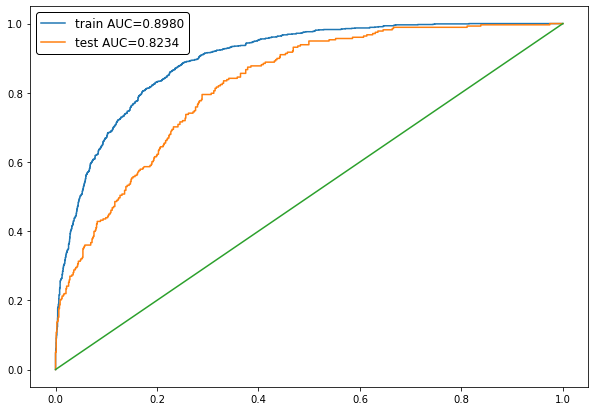

In [40]:


y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]


train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=np.arange(3,data.shape[1]-1),
                                             eval_metric='AUC:hints=skip_train~false')
boosting_model.grid_search({'learning_rate': np.linspace(0, 1, 100),
                           'num_trees': np.linspace(1, 15, 15)}, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1

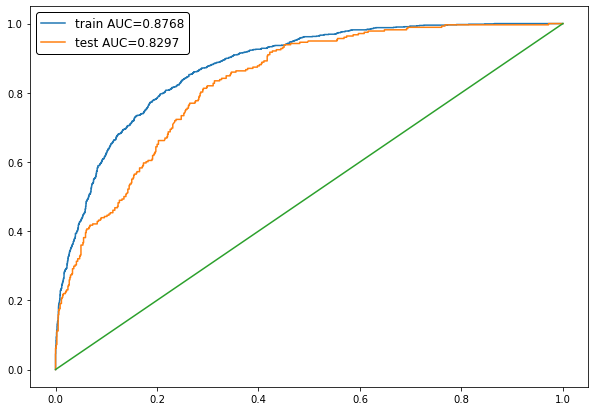

In [41]:
params = {
    'n_estimators': 284, 
    'max_depth': 4, 
    'subsample': 0.69839013, 
    'l2_leaf_reg': 3.180242,
    'random_strength': 1.242313, 
    'eta': 0.0435602, 
    'min_data_in_leaf': 1, 
    'grow_policy': 'Lossguide', 
    'silent': True, 
    'eval_metric': 'AUC:hints=skip_train~false'
    
}

boosting_model = catboost.CatBoostClassifier(cat_features=np.arange(3,data.shape[1]-1),**params)
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

$ alpha^2 = 0.8297, max_depth = 4, iterations = 254 $

# Предсказания

In [51]:
submission = pd.read_csv('./submission.csv')
X_test = pd.read_csv('test.csv')
X_test['TotalSpent'] = X_test['TotalSpent'].replace(' ','0', regex=True).astype('float64')
submission['Churn'] =  boosting_model.predict_proba(X_test)[:,1]

submission.to_csv('./submission.csv')

mean_proba_true = submission[submission['Churn']>=0.5].Churn.mean()
mean_proba_false = submission[submission['Churn']<0.5].Churn.mean()

print(f'mean predicted probability for class "1" - {mean_proba_true}')
print(f'mean predicted probability for class "0" - {mean_proba_false}')
submission.sample(5)

mean predicted probability for class "1" - 0.679724907096461
mean predicted probability for class "0" - 0.14477981764140357


,Unnamed: 0,Unnamed: 0.1,Id,Churn
1359,1359,1359,1359,0.162783
340,340,340,340,0.543173
1523,1523,1523,1523,0.147240
422,422,422,422,0.450843
61,61,61,61,0.608694


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.